# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.preprocessing import StandardScaler

In [2]:
# train_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
# test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

train_df_ = pd.read_csv('data/train.csv')
test_df_ = pd.read_csv('data/test.csv')

# description of the data

In [3]:
print(f"Train shape: {train_df_.shape}")
print(f"Test shape: {test_df_.shape}")

Train shape: (617, 58)
Test shape: (5, 57)


- We have 617 rows and 57 features in the dataset.

In [4]:
train_df_.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
test_df_.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
features = train_df_.columns[1:-1]
features

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')

In [7]:
train_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [8]:
y_train = train_df_['Class']
train_df = train_df_.drop('Class', axis=1)

ids = test_df_['Id']
train_df.drop('Id', axis=1, inplace=True)
test_df = test_df_.drop('Id', axis=1)

- Here `EJ` is the categorical feature and `Class` is the target variable

- We don't know exactly what the feature `EJ` means, hence let's convert it to a numerical feature

In [9]:
# do one-hot encoding to EJ column

train_df['EJ'] = train_df['EJ'].apply(lambda x: 1 if x == 'Yes' else 0)
test_df['EJ'] = test_df['EJ'].apply(lambda x: 1 if x == 'Yes' else 0)

# `Class` distribution

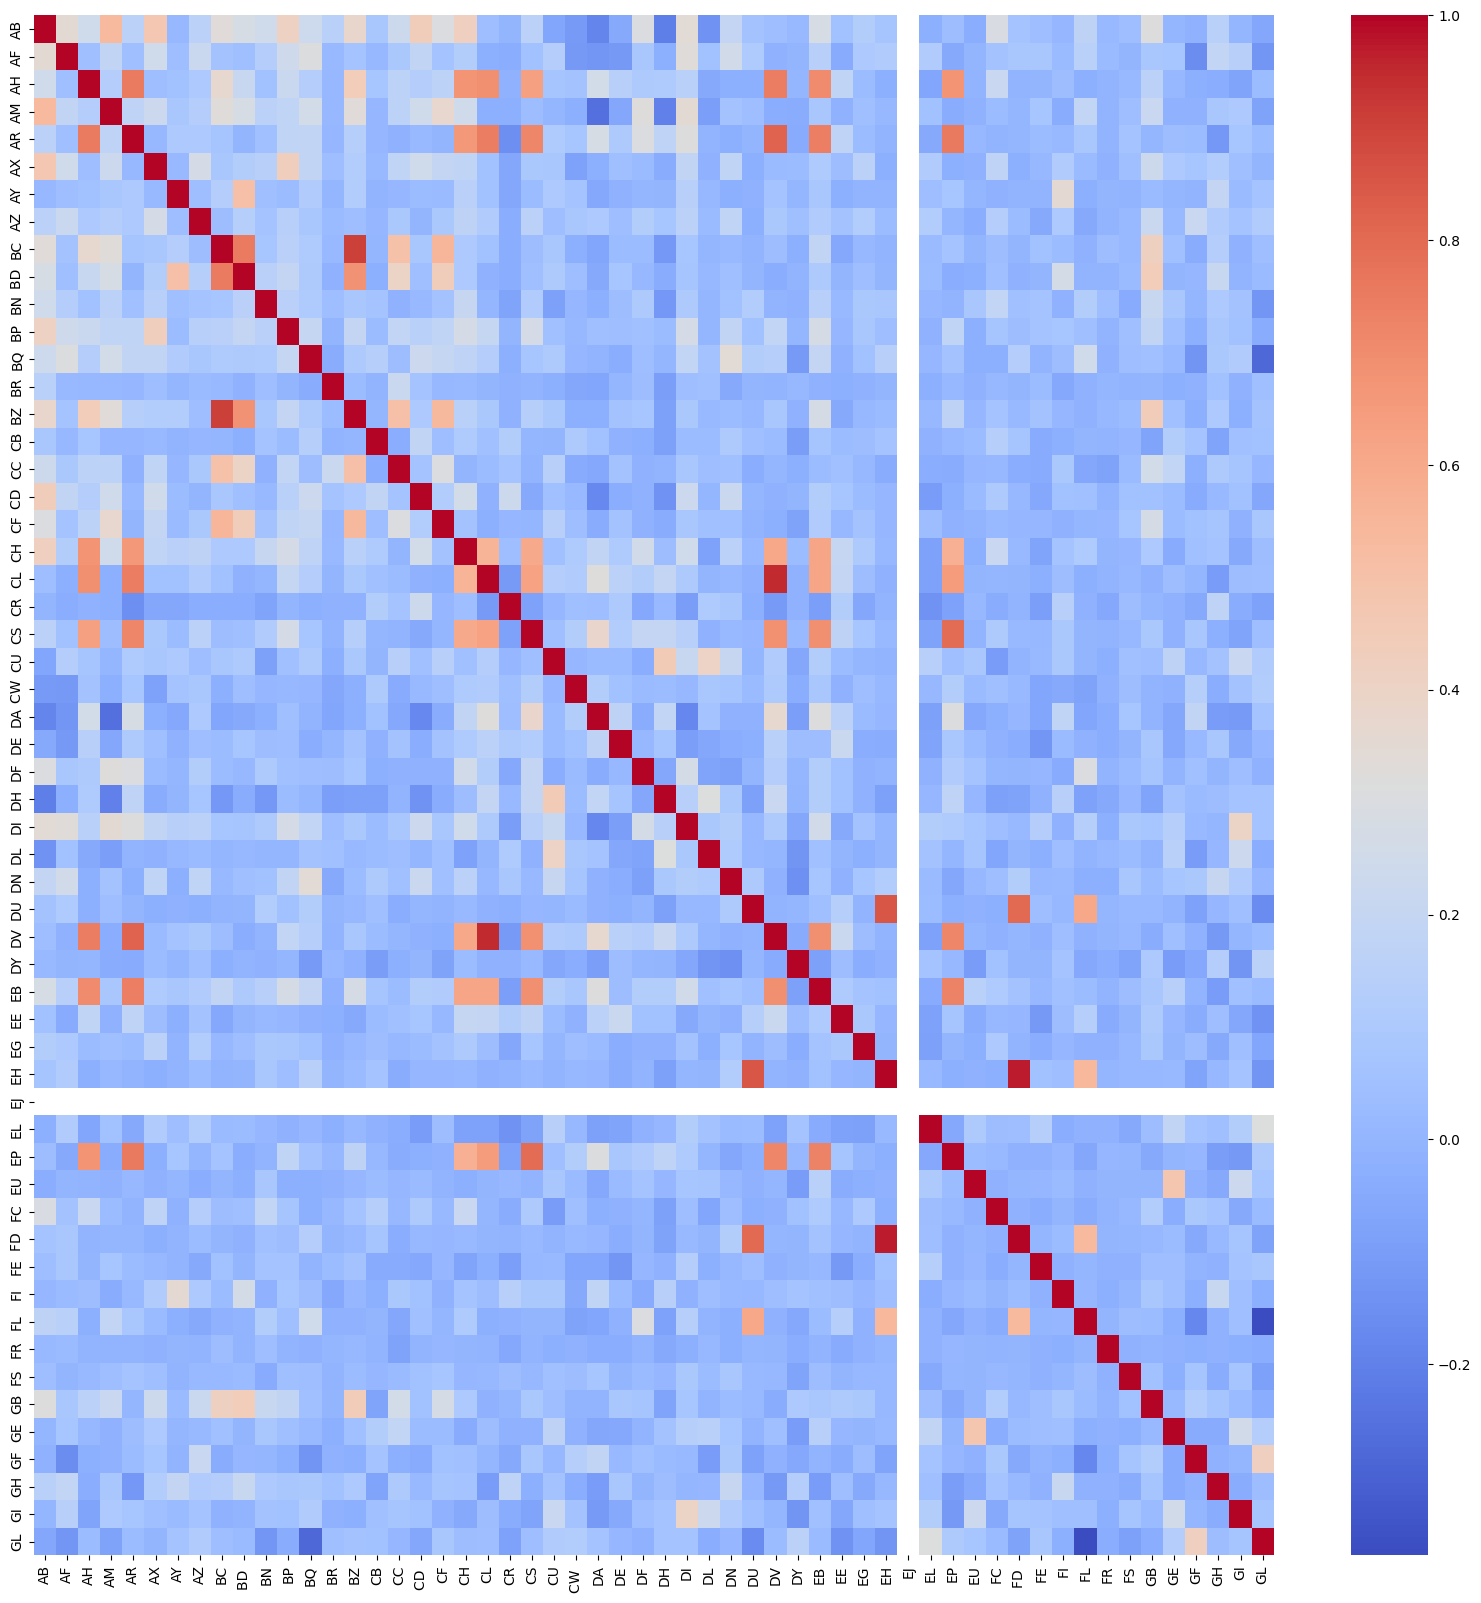

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), cmap='coolwarm');

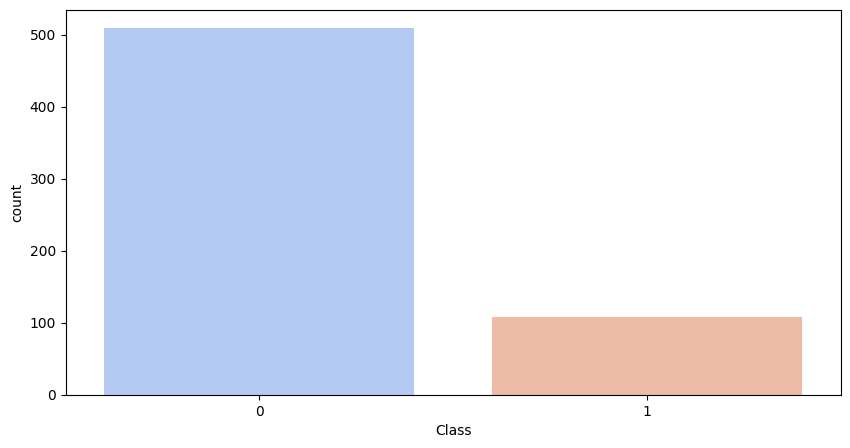

In [13]:
# histogram of the target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=train_df_, palette='coolwarm');


- Data is highly imbalanced. We will use `Class Weights` to handle this.

# Missing values

In [14]:
# print % of the columns with missing values
print('Train data missing values:')
print(train_df.isnull().sum()[train_df.isnull().sum() > 0]/len(train_df)*100)

Train data missing values:
BQ    9.724473
CB    0.324149
CC    0.486224
DU    0.162075
EL    9.724473
FC    0.162075
FL    0.162075
FS    0.324149
GL    0.162075
dtype: float64


- Approx 10% data is missing in BQ and EL classes and rest of the classes have very less missing values.

- As most of the classes have 1-2 missing values, we can impute every coloumn with median except those which have more than 2 missing values.  

In [15]:
col_fill_na_median = []
col_fill_na_knn = []

for col in train_df.columns:
    if train_df[col].isnull().sum() > 2:
        col_fill_na_knn.append(col)
    elif train_df[col].isnull().sum() > 0:
        col_fill_na_median.append(col)
        
        

In [16]:
col_fill_na_median

['CB', 'DU', 'FC', 'FL', 'FS', 'GL']

In [17]:
col_fill_na_knn

['BQ', 'CC', 'EL']

In [18]:
# fill missing values with mdeian, make a column transformer

transformers = []
transformers.append(
    (
        "median_imputer",
        SimpleImputer(
            strategy="median",
        ),
        col_fill_na_median,
    )
)

- As BQ and EL have 10% missing values, we can impute them with KNN imputer.

In [19]:
# fill all the left missing values with KNN

transformers.append(
    (
        "knn_imputer",
        KNNImputer(
            n_neighbors=5,
            add_indicator=False,
        ),
        col_fill_na_knn,
    )
)

In [20]:
transformers

[('median_imputer',
  SimpleImputer(strategy='median'),
  ['CB', 'DU', 'FC', 'FL', 'FS', 'GL']),
 ('knn_imputer', KNNImputer(), ['BQ', 'CC', 'EL'])]

- Let's see is there any change in the distribution after performing the preprocessing

In [21]:
preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [22]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['CB', 'DU', 'FC', 'FL', 'FS', 'GL']),
                                ('knn_imputer', KNNImputer(),
                                 ['BQ', 'CC', 'EL'])])

In [23]:
preprocessed_train = preprocessor.fit_transform(train_df)
preprocessed_test = preprocessor.transform(test_df)

In [24]:
preprocessed_train.shape, train_df.shape

((617, 56), (617, 56))

In [25]:
# check if there are any missing values
print('Train data missing values:')
print(pd.DataFrame(preprocessed_train).isnull().sum()[pd.DataFrame(preprocessed_train).isnull().sum() > 0]/len(preprocessed_train)*100)

print('Test data missing values:')
print(pd.DataFrame(preprocessed_test).isnull().sum()[pd.DataFrame(preprocessed_test).isnull().sum() > 0]/len(preprocessed_test)*100)

Train data missing values:
Series([], dtype: float64)
Test data missing values:
Series([], dtype: float64)


- Before Preprocessing

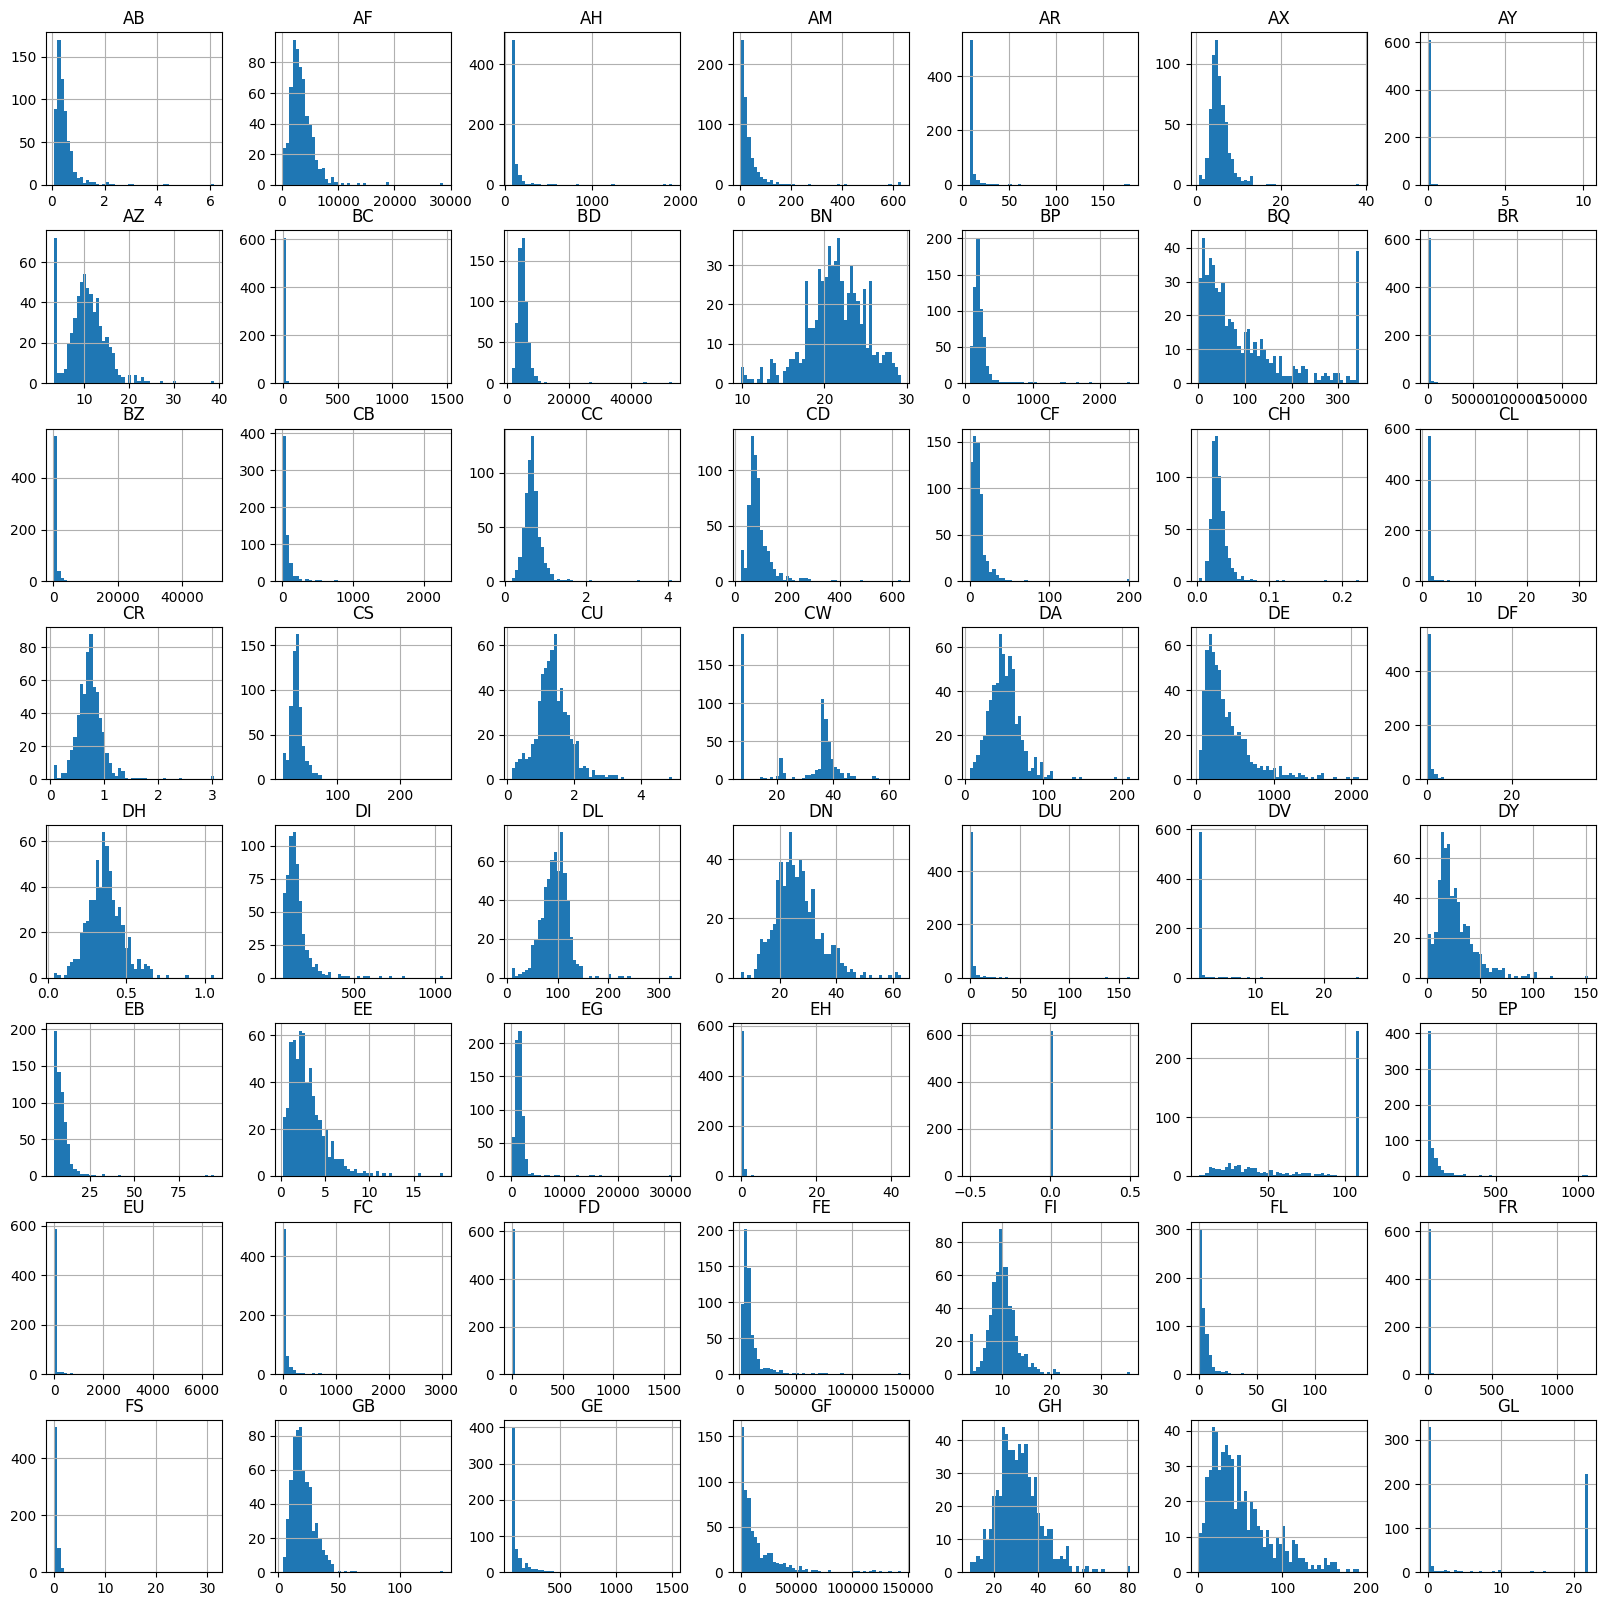

In [26]:

train_df.hist(figsize=(20, 20), bins=50, legend = False);

- After preprocessing

In [27]:
preprocessed_train.shape

(617, 56)

In [28]:
total_cols = col_fill_na_median + col_fill_na_knn

total_cols

['CB', 'DU', 'FC', 'FL', 'FS', 'GL', 'BQ', 'CC', 'EL']

- After Preprocessing these columns will come first in the preprocessed dataset.

In [29]:

total_cols

['CB', 'DU', 'FC', 'FL', 'FS', 'GL', 'BQ', 'CC', 'EL']

In [30]:
final_cols  = total_cols + list(features.drop(total_cols) )


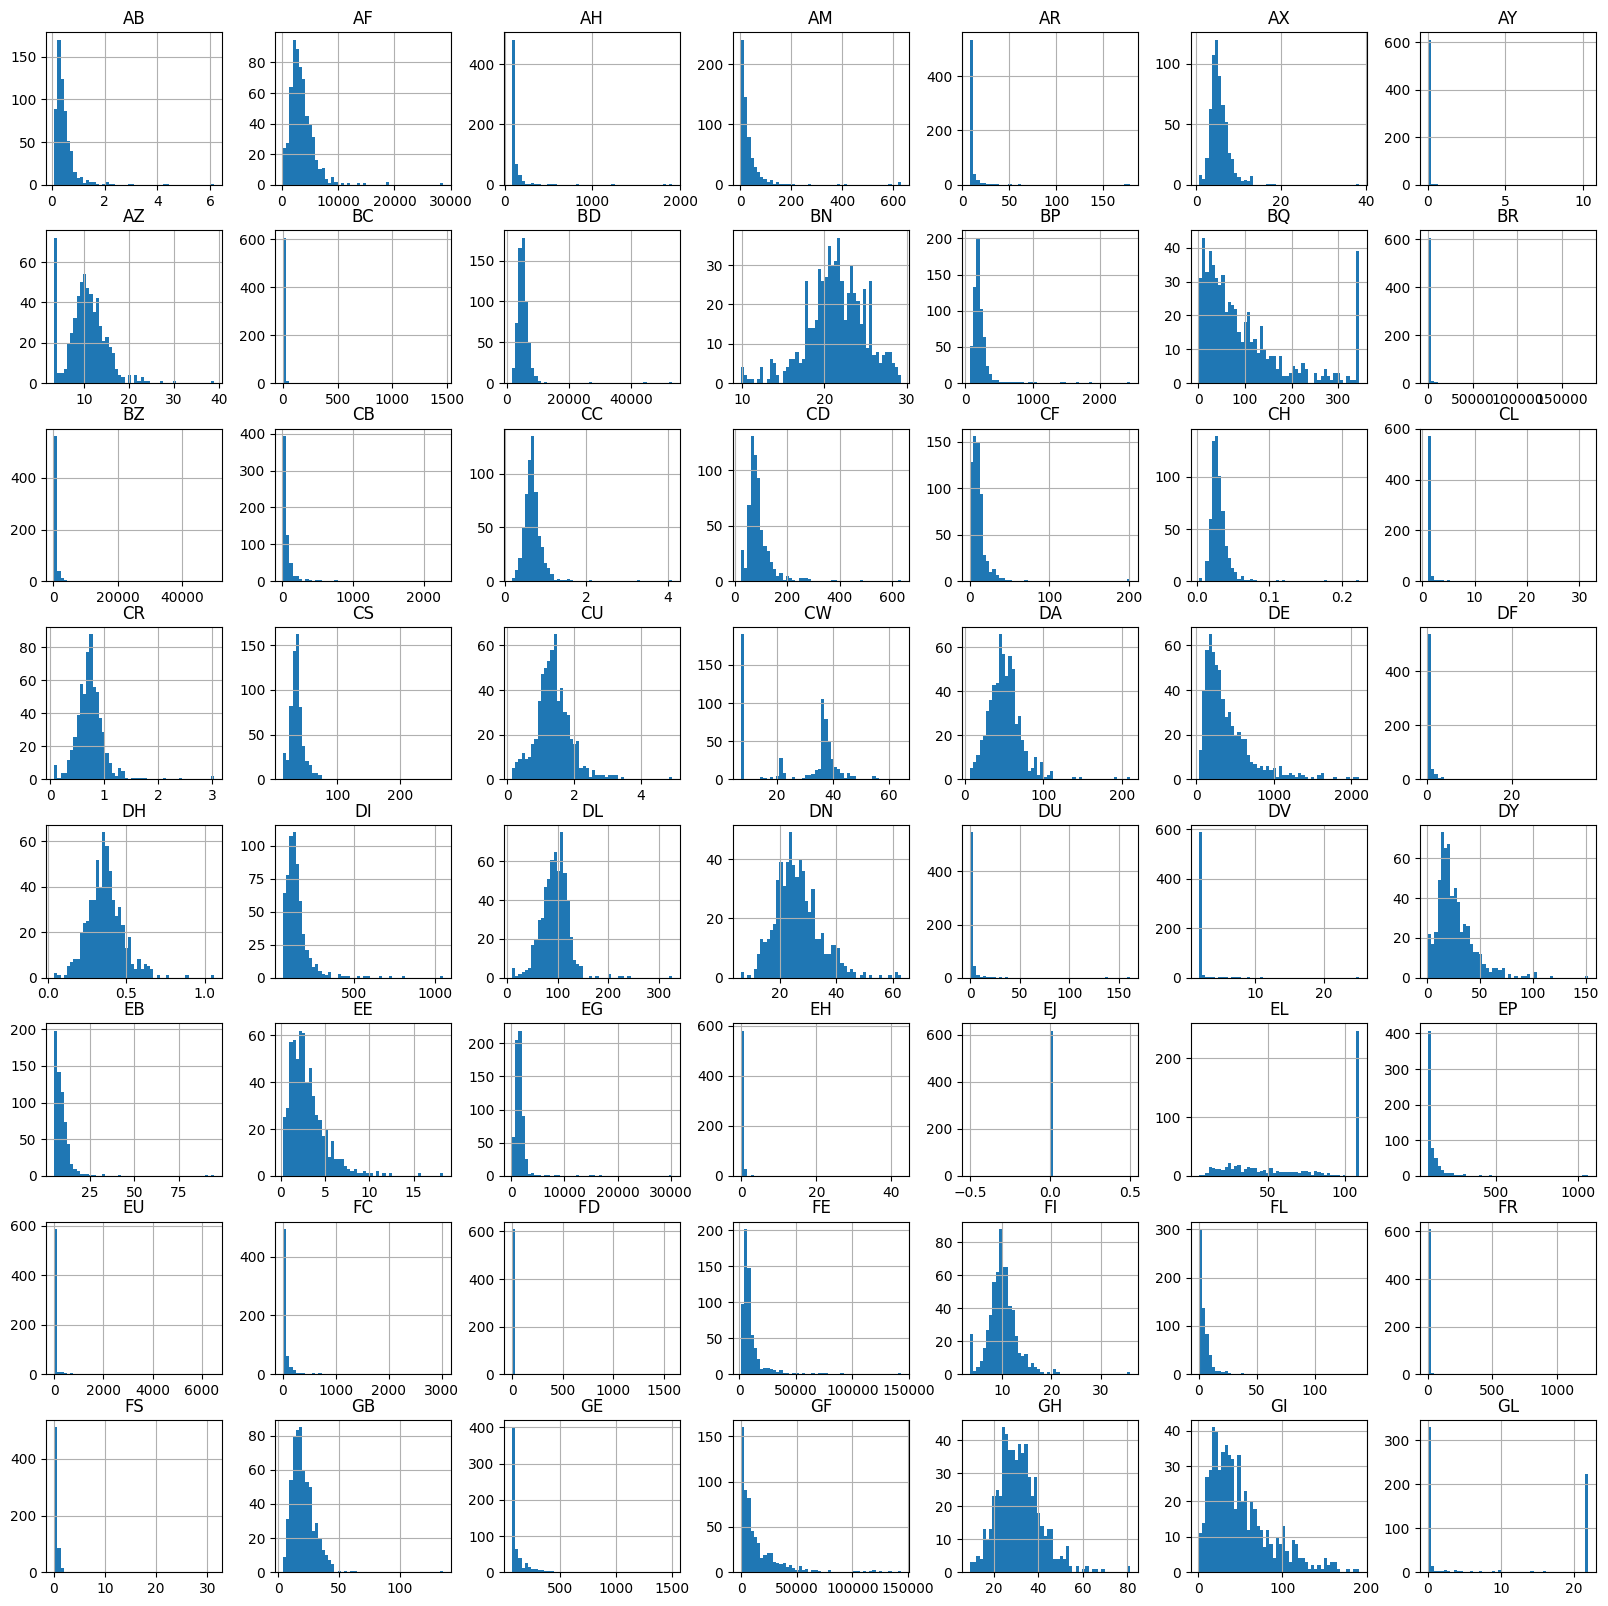

In [31]:
preprocessed_train_df = pd.DataFrame(preprocessed_train, columns=final_cols)
# arranges the columns in the same order as the original dataframe
preprocessed_train_df = preprocessed_train_df[features]

preprocessed_train_df.hist(figsize=(20, 20), bins=50, legend = False);

- Here we can see that the distribution of the data is not changed after preprocessing.

# scaling

In [32]:
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,11.516657,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,35.851039,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000


- Here the scale of some features is very large and some are very small. So we need to scale the data, specially for the algorithms which are distance based.

- We will normalize the data using `StandardScaler`

In [33]:
# Standardize the data
scaler = ("scaler", StandardScaler(), features)

preprocessor = ColumnTransformer(transformers=[scaler], remainder='passthrough')

preprocessor.fit_transform(preprocessed_train_df).shape

(617, 56)

- Hence the final Preprocessing pipeline will contain the following steps:

- Imputing the missing values with median (where missing values are less than 2)
- Imputing the missing values with KNN imputer (where missing values are more than 2)

- Scaling the data using StandardScaler

In [34]:
final_process_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                            ("scaler", StandardScaler())])

final_process_pipeline.fit_transform(train_df).shape

(617, 56)